In [278]:
import pydotplus
import numpy as np
import seaborn as sns
from sklearn import tree
from IPython.display import Image, display
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
from IPython.display import Image, display
from subprocess import call

from sklearn.model_selection import train_test_split     
from sklearn.metrics import accuracy_score,classification_report 

In [279]:
# dataset = pd.read_csv('german1-data-numeric_copy.csv',names = ['chk_acc_status', 'duration_month','credit_history',
#                                                                'purpose', 'credit_amt', 'emp_dur','inst_rate','status_sex',
#          'debtors_guarantors', 'res_since', 'property','age', 'C13', 'C14', 'C15',
#          'C16', 'C17','C18', 'C19','C20', 'C21','C22','C23','C24','C25','C26'])

## Load the data 

In [280]:
#importing the dataset
# dataset = pd.read_csv('german1-data-numeric_copy.csv',names = ['C1', 'C2','C3', 'C4', 'C5', 'C6','C7','C8',
#          'C9', 'C10', 'C11','C12', 'C13', 'C14', 'C15',
#          'C16', 'C17','C18', 'C19','C20', 'C21','C22','C23','C24','C25','C26'])



# dataset = pd.read_csv('german1-data-numeric_copy.csv',names = ['chk_acc_status', 'duration_month','credit_history',
#                                                                'purpose', 'credit_amt', 'sav_acc_bond','emp_since',
#                                                                'inst_rate',
#          'status_sex', 'debtors_guarantors', 'residence_since','property', 'Age', 'inst_plans', 'housing',
#          'existing_credit', 'job','peoplel_liable', 'telephone','foreign_worker', 'cost_matrix','C22','C23','C24','C25','C26'])

#print(dataset['age'])
dataset = pd.read_csv('german_creditdata.csv')




dataset.head(10)

,chk_acc_status,duration_month,credit_history,purpose,credit_amt,sav_acc_bond,emp_since,inst_rate,status_sex,debtors_guarantors,...,property,Age,inst_plans,housing,existing_credit,job,peoplel_liable,telephone,foreign_worker,cost_matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [281]:
dataset.keys()

Index(['chk_acc_status', 'duration_month', 'credit_history', 'purpose',
       'credit_amt', 'sav_acc_bond', 'emp_since', 'inst_rate', 'status_sex',
       'debtors_guarantors', 'residence_since', 'property', 'Age',
       'inst_plans', 'housing', 'existing_credit', 'job', 'peoplel_liable',
       'telephone', 'foreign_worker', 'cost_matrix'],
      dtype='object')

In [282]:
# rem_columns = ['duration_month', 'credit_history', 'purpose',
#        'credit_amt', 'sav_acc_bond', 'emp_since', 'inst_rate', 'status_sex',
#        'debtors_guarantors', 'residence_since', 'property', 'Age',
#        'inst_plans', 'housing', 'existing_credit', 'job', 'peoplel_liable',
#        'telephone', 'foreign_worker', 'cost_matrix']
# dataset = dataset[rem_columns]

In [283]:
dataset.head()

,chk_acc_status,duration_month,credit_history,purpose,credit_amt,sav_acc_bond,emp_since,inst_rate,status_sex,debtors_guarantors,...,property,Age,inst_plans,housing,existing_credit,job,peoplel_liable,telephone,foreign_worker,cost_matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### The Variable types

In [284]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
chk_acc_status        1000 non-null object
duration_month        1000 non-null int64
credit_history        1000 non-null object
purpose               1000 non-null object
credit_amt            1000 non-null int64
sav_acc_bond          1000 non-null object
emp_since             1000 non-null object
inst_rate             1000 non-null int64
status_sex            1000 non-null object
debtors_guarantors    1000 non-null object
residence_since       1000 non-null int64
property              1000 non-null object
Age                   1000 non-null int64
inst_plans            1000 non-null object
housing               1000 non-null object
existing_credit       1000 non-null int64
job                   1000 non-null object
peoplel_liable        1000 non-null int64
telephone             1000 non-null object
foreign_worker        1000 non-null object
cost_matrix           1000 non-null int64

### Unique Values

In [285]:
print(dataset.nunique())

chk_acc_status          4
duration_month         33
credit_history          5
purpose                10
credit_amt            921
sav_acc_bond            5
emp_since               5
inst_rate               4
status_sex              4
debtors_guarantors      3
residence_since         4
property                4
Age                    53
inst_plans              3
housing                 3
existing_credit         4
job                     4
peoplel_liable          2
telephone               2
foreign_worker          2
cost_matrix             2
dtype: int64


### Check for Null columns

In [286]:
null_columns=dataset.columns[dataset.isnull().any()]
print(dataset[dataset.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


### Modifying status indicator
Changing the credit status variable to 0 and 1 for conventional classification represenations. 0 indicates good credit and 1 indicates bad credit.

In [287]:
dataset['cost_matrix'] = dataset['cost_matrix']-1 

In [288]:
dataset['cost_matrix'].value_counts()


0    700
1    300
Name: cost_matrix, dtype: int64

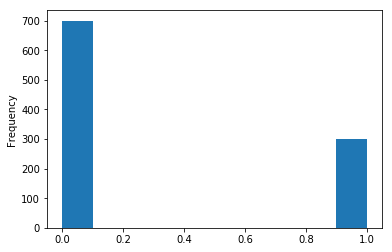

In [289]:
dataset['cost_matrix'].astype(int).plot.hist();

In [290]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = dataset[['cost_matrix', 'credit_amt', 'inst_rate', 'residence_since', 'Age']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,cost_matrix,credit_amt,inst_rate,residence_since,Age
cost_matrix,1.000000,0.154739,0.072404,0.002967,-0.091127
credit_amt,0.154739,1.000000,-0.271316,0.028926,0.032716
inst_rate,0.072404,-0.271316,1.000000,0.049302,0.058266
residence_since,0.002967,0.028926,0.049302,1.000000,0.266419
Age,-0.091127,0.032716,0.058266,0.266419,1.000000


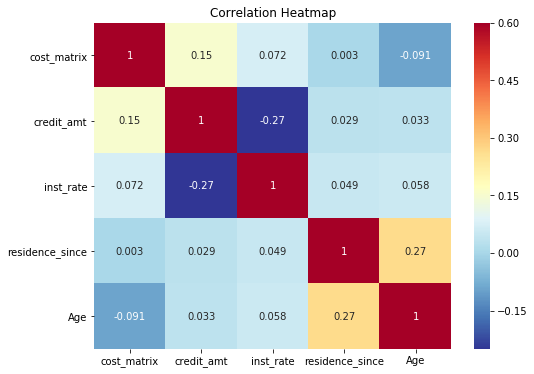

In [291]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Dist Plot

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

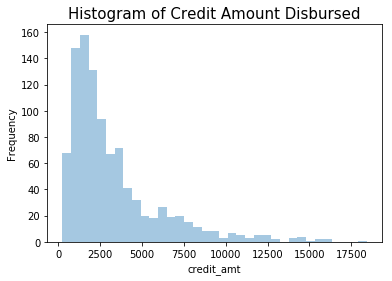

In [292]:
sns.distplot( dataset.credit_amt, kde = False )
plt.title( "Histogram of Credit Amount Disbursed", fontsize = 15)
plt.ylabel( "Frequency")

### Note: Most of the credit amounts are less than 5000 with some higher credit amounts. The largest amount disbursed is as high as 18000

In [293]:
dataset.credit_amt.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amt, dtype: float64

Text(0.5,1,'Boxplot of Credit Amount Disbursed')

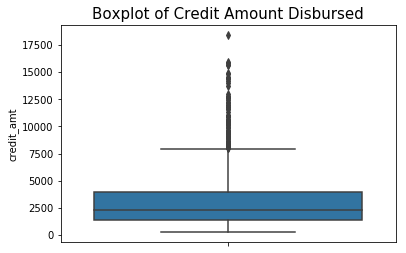

In [294]:
sns.boxplot( dataset.credit_amt, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed", fontsize = 15)

### Note: The middle 50% of the population lies between 1300 to 3900

Text(0.5,1,'Boxplot of Credit Amount Disbursed by Credit Status')

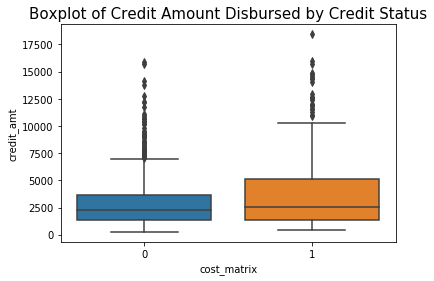

In [295]:
sns.boxplot( x = 'cost_matrix', y = 'credit_amt', data = dataset, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status", fontsize = 15)

### Note: Lot of higher credit amounts seem to have been defaulted

### Pair Plotting

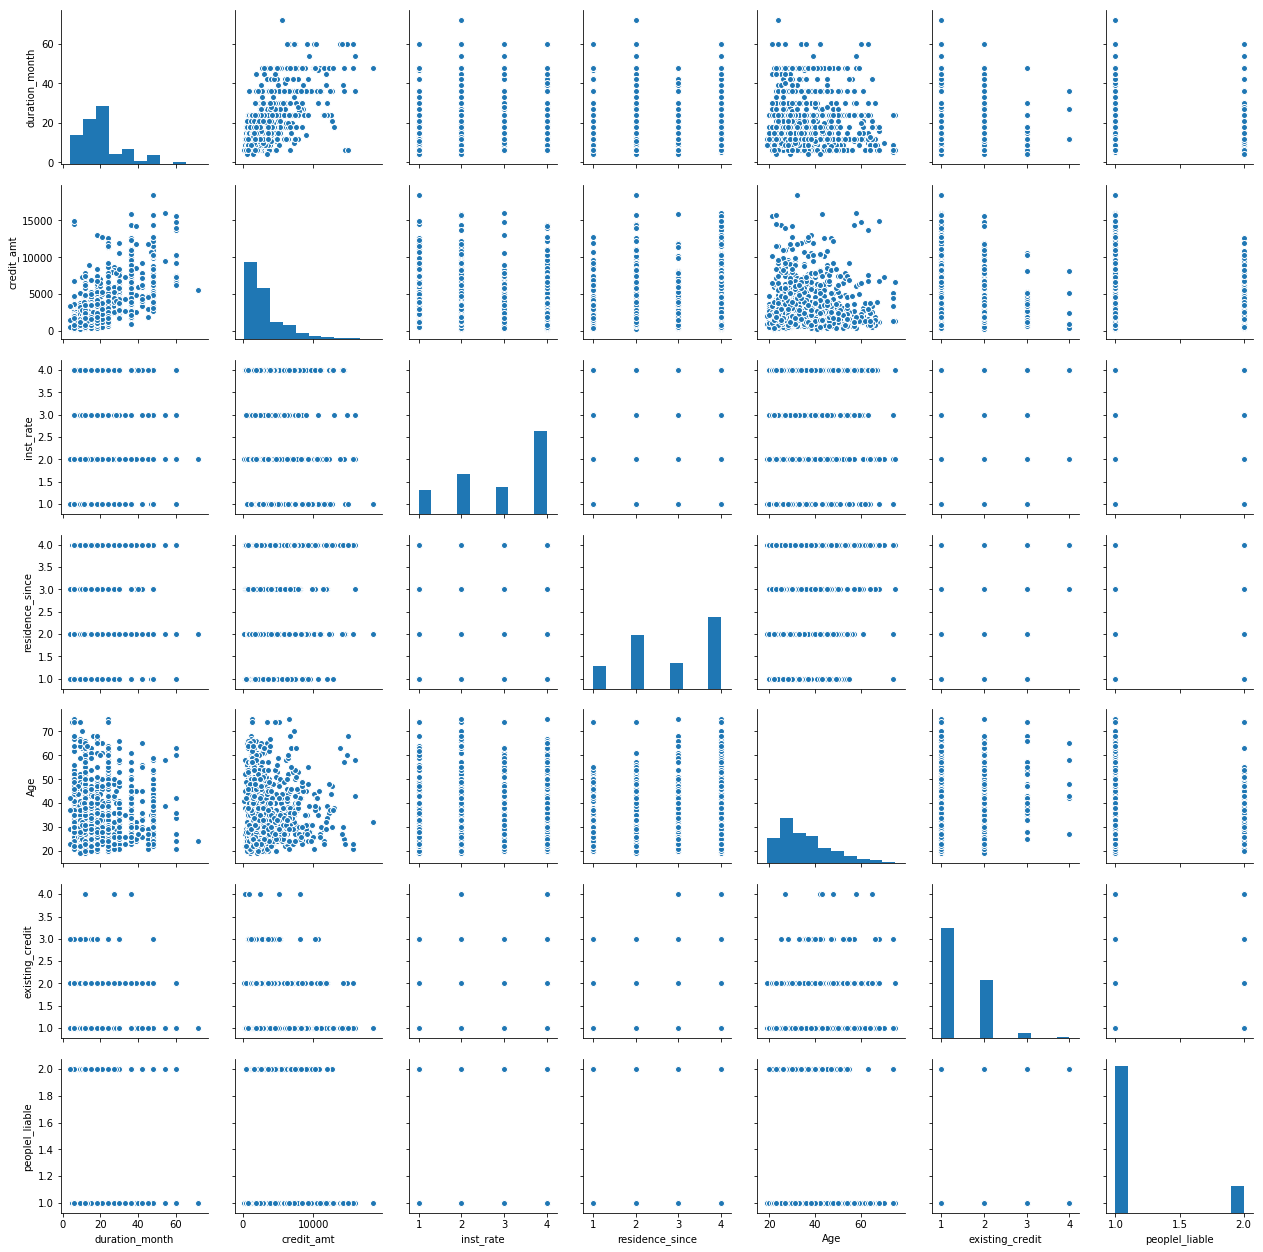

In [296]:
sns.pairplot( dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, :-1] )

In [297]:
dataset.shape

(1000, 21)

In [298]:
dataset[['chk_acc_status', 'duration_month','credit_history','purpose', 'credit_amt', 'sav_acc_bond']].head()

,chk_acc_status,duration_month,credit_history,purpose,credit_amt,sav_acc_bond
0,A11,6,A34,A43,1169,A65
1,A12,48,A32,A43,5951,A61
2,A14,12,A34,A46,2096,A61
3,A11,42,A32,A42,7882,A61
4,A11,24,A33,A40,4870,A61


In [299]:
dataset[['emp_since','inst_rate',
         'status_sex', 'debtors_guarantors', 'residence_since','property', 'Age',]].head()

,emp_since,inst_rate,status_sex,debtors_guarantors,residence_since,property,Age
0,A75,4,A93,A101,4,A121,67
1,A73,2,A92,A101,2,A121,22
2,A74,2,A93,A101,3,A121,49
3,A74,2,A93,A103,4,A122,45
4,A73,3,A93,A101,4,A124,53


In [300]:
dataset[['inst_plans', 'housing',
         'existing_credit', 'job','peoplel_liable', 'telephone','foreign_worker', 'cost_matrix']].head()

,inst_plans,housing,existing_credit,job,peoplel_liable,telephone,foreign_worker,cost_matrix
0,A143,A152,2,A173,1,A192,A201,0
1,A143,A152,1,A173,1,A191,A201,1
2,A143,A152,1,A172,2,A191,A201,0
3,A143,A153,1,A173,2,A191,A201,0
4,A143,A153,2,A173,2,A191,A201,1


## to categorise using categorical 

In [ ]:
# from sklearn import preprocessing
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# le=LabelEncoder()
# for col in dataset.columns.values:
#        # Encoding only categorical variables
#        if dataset[col].dtypes=='object':
#        # Using whole data to form an exhaustive list of levels
#            data123=dataset[col].append(dataset[col])
#            le.fit(data123.values)
#            dataset[col]=le.transform(dataset[col])
    
# dataset.head(2)

### SCALING AND PCA

### X = all values except last column
#### Y =  last column

In [ ]:
X = dataset.iloc[:,:24]
y = dataset.iloc[:,24]

In [ ]:
# the data is unbalanced, so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

In [ ]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['credit_amt','Age']) # PC=principal component
X_pca.sample(5)

In [302]:
# from matplotlib.patches import Ellipse
# import numpy as np
# def draw_ellipse(position, covariance, ax=None, **kwargs):
#     """Draw an ellipse with a given position and covariance"""
#     ax = ax or plt.gca()
    
#     # Convert covariance to principal axes
#     if covariance.shape == (2, 2):
#         U, s, Vt = np.linalg.svd(covariance)
#         angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
#         width, height = 2 * np.sqrt(s)
#     else:
#         angle = 0
#         width, height = 2 * np.sqrt(covariance)
    
#     # Draw the Ellipse
#     for nsig in range(1, 4):
#         ax.add_patch(Ellipse(position, nsig * width, nsig * height,
#                              angle, **kwargs))
        
# def plot_gmm(gmm, X, label=True, ax=None):
#     ax = ax or plt.gca()
#     labels = gmm.fit(X).predict(X)
#     if label:
#             ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
#     else:
#         ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
#     ax.axis('equal')
    
#     w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)

In [303]:
# number_of_components=4
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components=number_of_components,covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(dataset.values)
# labels = gmm.predict(dataset.values)
# test_features= ['Age','credit_amt']
# X = dataset[test_features].values

# plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');
# plt.title("GMM for car dataset n_components=4")
# plot_gmm(gmm,X)

In [322]:
dataset.head()

,chk_acc_status,duration_month,credit_history,purpose,credit_amt,sav_acc_bond,emp_since,inst_rate,status_sex,debtors_guarantors,...,property,Age,inst_plans,housing,existing_credit,job,peoplel_liable,telephone,foreign_worker,cost_matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


## Linear regression
The following steps are applied in linear regression modeling in industry:

### Missing value and outlier treatment
### Correlation check of independent variables
### Train and test random classification
### Fit the model on train data
### Evaluate model on test data

In [323]:
from sklearn.model_selection import train_test_split     
from sklearn.metrics import r2_score 
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [324]:
x_train,x_test,y_train,y_test = train_test_split (dataset ['credit_amt'], dataset["Age"],test_size = 0.2,random_state=42)

In [325]:
c

(800, 1)
(800, 1)


In [326]:
x1= dataset['duration_month']
x2 = dataset['inst_rate']
x3 = dataset['Age']

y = dataset['credit_amt']
x = np.column_stack((x1,x2,x3))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(y,x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             credit_amt   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     329.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          1.68e-148
Time:                        09:50:47   Log-Likelihood:                -9019.4
No. Observations:                1000   AIC:                         1.805e+04
Df Residuals:                     996   BIC:                         1.807e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1851.8434    281.091      6.588      0.0

## Using - Scipy stats.. calculate errors/accuracies

In [327]:
gradient,intercept,r_value,p_value,std_err=stats.linregress(dataset ['credit_amt'],dataset["Age"])

In [328]:
print("Gradient and intercept",gradient,intercept)

Gradient and intercept 0.00013184529270566654 35.11470003147424


In [329]:
print ("R-squared",r_value**2)

R-squared 0.0010703639194272123


In [330]:
print ("p-value",p_value)

p-value 0.30133879995606827


with a beta of 0.00013184529270566654 and an R-Squared value of 0.0010703639194272123, we see that the movements of the credit amt are not highly correlated with that of the age.

use the numpy and scipy libraries to be able to conduct regression analysis on two arrays (x and y) in order to determine the intercept and slope, along with the p-value, R-Squared value, and standard error.

From the test R-squared value, we can conclude that there is no strong relationship between credit_amt and age variables in the data, as R-squared is less than 0.7.

In [334]:
# define true and predicted response values
# y_true = [100, 50, 30, 20]
# y_pred = [90, 50, 50, 30]

lm2 = LinearRegression()
lm2.fit(x_train, y_train)
y_pred = lm2.predict(x_test)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)



[35.13761277]
[[0.00012532]]


# RMSE - lesser value is better, close to zero is better

In [335]:
from statsmodels.tools.eval_measures import rmse
print ("RMSE -> %f" % rmse(y_pred, y_test))


# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print("mean_squared_error-->",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE -> 11.222747
8.881532944681947
125.95005198999523
mean_squared_error--> 11.222747078589771


In [338]:
y_test.head()

,Age
521,24
737,35
740,32
660,23
411,35


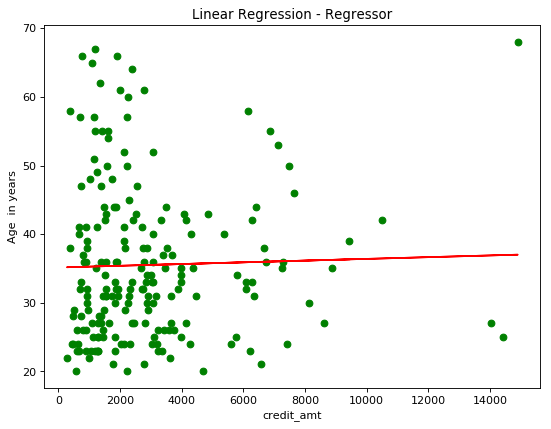

In [337]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x_test, y_test, c='g')
#plt.scatter(X_train, y_train)
plt.plot(x_test, y_pred, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("credit_amt")
plt.ylabel("Age  in years")
plt.show()

## multivariate X 

In [340]:
x_train,x_test,y_train,y_test = train_test_split (dataset [['credit_amt','duration_month']], dataset["Age"],test_size = 0.2,random_state=42)

In [341]:
x_train = pd.DataFrame(x_train);
x_test = pd.DataFrame(x_test) 
y_train = pd.DataFrame(y_train);
y_test = pd.DataFrame(y_test) 
print(x_train.shape)
#y_train.shape
print(y_train.shape)

(800, 2)
(800, 1)


In [342]:
lm2 = LinearRegression()
lm2.fit(x_train, y_train)
y_pred = lm2.predict(x_test)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

[36.46635843]
[[ 0.00039619 -0.10614104]]


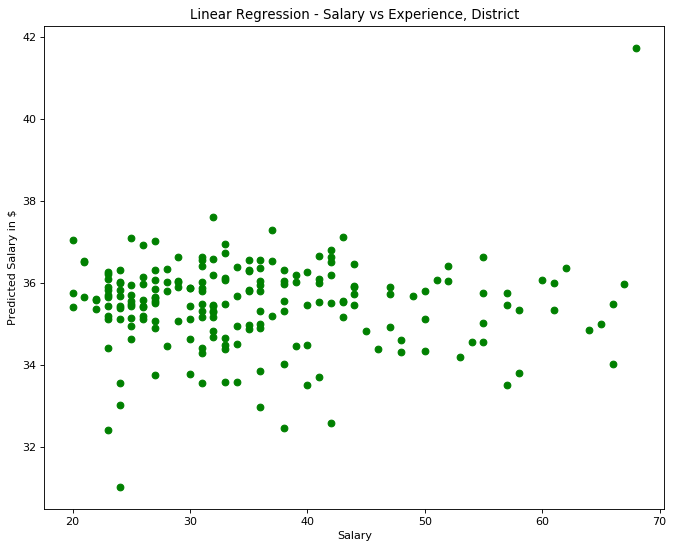

In [345]:
# from matplotlib.pyplot import figure

# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(x_test, y_test, c='g')
# #plt.scatter(X_train, y_train)
# plt.plot(x_test, y_pred, c='r')
# plt.title("Linear Regression - Regressor")
# plt.xlabel("credit_amt")
# plt.ylabel("Age  in years")
# plt.show()



from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(y_test, y_pred, c='g')
#plt.scatter(X_train, y_train)
#plt.plot(X_dis_test, pred_mul, c='r')
plt.title("Linear Regression - Salary vs Experience, District")
plt.xlabel("Salary")
plt.ylabel("Predicted Salary in $")
plt.show()

## Logistic Regression

### Calculate Information Value

In [195]:
def IV_calc(data,var): 
    if data[var].dtypes == "object": 
        dataf = data.groupby([var])['cost_matrix'].agg(['count','sum']) 
        dataf.columns = ["Total","bad"]     
        dataf["good"] = dataf["Total"] - dataf["bad"] 
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum() 
        dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
        return dataf 
    else: 
            data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
            dataf = data.groupby(['bin_var'])['cost_matrix'].agg(['count','sum']) 
            dataf.columns = ["Total","bad"]     
            dataf["good"] = dataf["Total"] - dataf["bad"] 
            dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum() 
            dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
            dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
    return dataf 


In [196]:
print ("\n\nCredit History - Information Value\n")



Credit History - Information Value



In [197]:
print (IV_calc(dataset,'credit_history'))

                Total  bad  good   bad_per  good_per       I_V
credit_history                                                
A30                40   25    15  0.083333  0.021429  0.084074
A31                49   28    21  0.093333  0.030000  0.071882
A32               530  169   361  0.563333  0.515714  0.004206
A33                88   28    60  0.093333  0.085714  0.000649
A34               293   50   243  0.166667  0.347143  0.132423


In [198]:
dataf = dataset.groupby(['Age'])['cost_matrix'].agg(['count','sum'])
#dataf

In [199]:
print ("\n\nCredit History - Duration in month\n")
print (IV_calc(dataset,'duration_month'))



Credit History - Duration in month

                 Total  bad  good   bad_per  good_per       I_V
bin_var                                                        
(0.999, 100.9]     100   11    89  0.036667  0.127143  0.112502
(100.9, 200.8]     100   20    80  0.066667  0.114286  0.025667
(200.8, 300.7]     100   27    73  0.090000  0.104286  0.002105
(300.7, 400.6]     100   25    75  0.083333  0.107143  0.005984
(400.6, 500.5]     100   26    74  0.086667  0.105714  0.003784
(500.5, 600.4]     100   38    62  0.126667  0.088571  0.013629
(600.4, 700.3]     100   32    68  0.106667  0.097143  0.000891
(700.3, 800.2]     100   31    69  0.103333  0.098571  0.000225
(800.2, 900.1]     100   42    58  0.140000  0.082857  0.029973
(900.1, 1000.0]    100   48    52  0.160000  0.074286  0.065765


In [200]:
dataset.keys()

Index(['chk_acc_status', 'duration_month', 'credit_history', 'purpose',
       'credit_amt', 'sav_acc_bond', 'emp_since', 'inst_rate', 'status_sex',
       'debtors_guarantors', 'residence_since', 'property', 'Age',
       'inst_plans', 'housing', 'existing_credit', 'job', 'peoplel_liable',
       'telephone', 'foreign_worker', 'cost_matrix', 'bin_var'],
      dtype='object')

In [201]:
discrete_columns = ['chk_acc_status', 'credit_history', 'purpose', 'sav_acc_bond','emp_since', 'status_sex', 'debtors_guarantors','property','inst_plans', 'housing', 'job', 'telephone', 'foreign_worker']
continuous_columns = ['duration_month', 'credit_amt', 'inst_rate', 'residence_since', 'Age','existing_credit', 'peoplel_liable']
total_columns = discrete_columns + continuous_columns
# List of IV values
Iv_list = []
for col in total_columns:
    assigned_data = IV_calc(data = dataset,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = dataset[col].dtypes
    Iv_list.append((iv_val,col,dt_type))
    
Iv_list = sorted(Iv_list,reverse = True)
for i in range(len(Iv_list)):
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

0.666 , chk_acc_status ,type = object
0.293 , credit_history ,type = object
0.261 , duration_month ,type = int64
0.196 , sav_acc_bond ,type = object
0.169 , purpose ,type = object
0.113 , property ,type = object
0.113 , credit_amt ,type = int64
0.103 , Age ,type = int64
0.098 , existing_credit ,type = int64
0.086 , emp_since ,type = object
0.083 , housing ,type = object
0.062 , inst_rate ,type = int64
0.058 , inst_plans ,type = object
0.049 , residence_since ,type = int64
0.045 , status_sex ,type = object
0.044 , foreign_worker ,type = object
0.034 , peoplel_liable ,type = int64
0.032 , debtors_guarantors ,type = object
0.009 , job ,type = object
0.006 , telephone ,type = object


In [202]:
dummy_stseca = pd.get_dummies(dataset['chk_acc_status'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(dataset['credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(dataset['purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(dataset['sav_acc_bond'], prefix='sav_acc')
dummy_presc = pd.get_dummies(dataset['emp_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(dataset['status_sex'], prefix='per_stat_sx')
dummy_property = pd.get_dummies(dataset['property'], prefix='property')
dummy_othinstpln = pd.get_dummies(dataset['inst_plans'], prefix='oth_inst_pln')
dummy_forgnwrkr = pd.get_dummies(dataset['foreign_worker'], prefix='forgn_wrkr')
dummy_othdts = pd.get_dummies(dataset['debtors_guarantors'], prefix='oth_debtors')

continuous_columns = ['duration_month', 'credit_amt', 'inst_rate', 'Age', 'existing_credit' ]

credit_continuous = dataset[continuous_columns]
credit_data_new = pd.concat([dummy_stseca,dummy_ch, dummy_purpose,dummy_savacc, dummy_presc,dummy_perssx, dummy_property, dummy_othinstpln,dummy_othdts, dummy_forgnwrkr,credit_continuous,dataset['cost_matrix']],axis=1)

In [203]:
credit_data_new.head()

,status_exs_accnt_A11,status_exs_accnt_A12,status_exs_accnt_A13,status_exs_accnt_A14,cred_hist_A30,cred_hist_A31,cred_hist_A32,cred_hist_A33,cred_hist_A34,purpose_A40,...,oth_debtors_A102,oth_debtors_A103,forgn_wrkr_A201,forgn_wrkr_A202,duration_month,credit_amt,inst_rate,Age,existing_credit,cost_matrix
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,6,1169,4,67,2,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,48,5951,2,22,1,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,12,2096,2,49,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,42,7882,2,45,1,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,24,4870,3,53,2,1


In [204]:
credit_data_new.shape

(1000, 51)

In [205]:
x_train,x_test,y_train,y_test = train_test_split( credit_data_new.drop(['cost_matrix'] ,axis=1),credit_data_new['cost_matrix'],train_size = 0.7,random_state=42)

y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [219]:
credit_data_new.head()

,status_exs_accnt_A11,status_exs_accnt_A12,status_exs_accnt_A13,status_exs_accnt_A14,cred_hist_A30,cred_hist_A31,cred_hist_A32,cred_hist_A33,cred_hist_A34,purpose_A40,...,oth_debtors_A102,oth_debtors_A103,forgn_wrkr_A201,forgn_wrkr_A202,duration_month,credit_amt,inst_rate,Age,existing_credit,cost_matrix
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,6,1169,4,67,2,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,48,5951,2,22,1,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,12,2096,2,49,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,42,7882,2,45,1,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,24,4870,3,53,2,1


In [207]:
remove_cols_extra_dummy = ['status_exs_accnt_A11', 'cred_hist_A30', 'purpose_A40', 'sav_acc_A61','pre_emp_snc_A71','per_stat_sx_A91', 'oth_debtors_A101','property_A121', 'oth_inst_pln_A141','forgn_wrkr_A201']

In [208]:
remove_cols_insig = ['oth_debtors_A102','pre_emp_snc_A73','cred_hist_A31','per_stat_sx_A94']
remove_cols = list(set(remove_cols_extra_dummy+remove_cols_insig))

In [209]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop( remove_cols, axis=1))).fit()
print (logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.456205
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            cost_matrix   No. Observations:                  700
Model:                          Logit   Df Residuals:                      662
Method:                           MLE   Df Model:                           37
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.2517
Time:                        01:41:42   Log-Likelihood:                -319.34
converged:                       True   LL-Null:                       -426.75
                                        LLR p-value:                 6.253e-27
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8431      0.903      0.934      0.351      -0.927       2.613

In [353]:
# from sklearn.linear_model import LogisticRegression
# m = LogisticRegression()`
# m.fit(x_train, y_train)

# # The estimated coefficients will all be around 1:
# print(m.coef_)

# # Those values, however, will show that the second parameter
# # is more influential
# print(np.std(x_train, 0)*m.coef_)



predictors = ['status_exs_accnt_A11', 'status_exs_accnt_A12', 'status_exs_accnt_A13',
       'status_exs_accnt_A14', 'cred_hist_A31', 'cred_hist_A32',
       'cred_hist_A33', 'cred_hist_A34', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'sav_acc_A62',
       'sav_acc_A63', 'sav_acc_A64', 'sav_acc_A65', 'pre_emp_snc_A72',
       'pre_emp_snc_A73', 'pre_emp_snc_A74', 'pre_emp_snc_A75',
       'per_stat_sx_A92', 'per_stat_sx_A93', 'per_stat_sx_A94',
       'property_A122', 'property_A123', 'property_A124', 'oth_inst_pln_A142',
       'oth_inst_pln_A143', 'duration_month', 'credit_amt', 'inst_rate', 'Age',
       'existing_credit']
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': logistic_model.feature_importances_ })
tmp = tmp.sort_values(by='Feature Importance', ascending= False)
plt.Figure(figsize= (7,4))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

[[-9.02321343e-04 -3.13170669e-01]
 [-3.93825721e-04 -4.85023563e-02]
 [-1.46931912e-04  1.71977820e-02]
 [-2.67926434e-04 -2.20057534e-02]
 [ 6.20464038e-05 -5.07643586e-02]
 [-3.64073747e-05  1.19289732e-02]
 [-9.66462660e-05 -1.16932908e-03]
 [-1.07276102e-04  9.29871386e-03]
 [-6.03024527e-05  3.52343117e-03]
 [-5.11939737e-05 -5.52741080e-03]
 [ 6.26007821e-05 -2.04196956e-02]
 [ 4.95469867e-05 -5.36079632e-03]
 [ 1.90216356e-05  5.54128961e-03]
 [ 1.23014732e-05 -8.93436255e-03]
 [-2.12447922e-04 -1.52643069e-02]
 [-7.39208198e-05  5.05015828e-03]
 [ 1.32971571e-05 -4.55904961e-02]
 [-5.17421165e-05 -7.01275111e-03]
 [ 4.57456277e-05 -1.44285121e-02]
 [ 3.99551607e-05 -3.34173508e-02]
 [ 5.14381720e-05 -4.93875022e-02]
 [-3.35730549e-05 -3.83003529e-02]
 [-1.27981712e-04 -5.78007246e-03]
 [ 2.47576848e-05 -1.12720928e-02]
 [ 4.80628583e-05 -5.30288331e-02]
 [ 2.28821404e-04 -1.07297754e-01]
 [ 1.87499418e-04 -7.46154709e-02]
 [-2.73824034e-04 -3.31909649e-03]
 [-5.83253570e-05 -1

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Length of passed values is 53, index implies 2

In [210]:
x_train.head()

,status_exs_accnt_A11,status_exs_accnt_A12,status_exs_accnt_A13,status_exs_accnt_A14,cred_hist_A30,cred_hist_A31,cred_hist_A32,cred_hist_A33,cred_hist_A34,purpose_A40,...,oth_debtors_A101,oth_debtors_A102,oth_debtors_A103,forgn_wrkr_A201,forgn_wrkr_A202,duration_month,credit_amt,inst_rate,Age,existing_credit
541,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,24,2032,4,60,2
440,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,12,1884,4,39,1
482,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,30,3622,4,57,2
422,0,1,0,0,0,0,0,0,1,1,...,1,0,0,1,0,12,958,2,47,2
778,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,36,5711,4,38,2


In [211]:
#oth_debtors_A102        -0.0164      0.495     -0.033      0.974 

In [212]:
# print ("\nVariance Inflation Factor")
# cnames = x_train.drop(remove_cols,axis=1).columns
# for i in np.arange(0,len(cnames)):
#     xvars = list(cnames)
#     yvar = xvars.pop(i)
#     mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar], sm.add_constant( x_train.drop (remove_cols,axis=1)[xvars]))
#     res = mod.fit()
#     vif = 1/(1-res.rsquared)
#     print (yvar,round(vif,3))
      

In [213]:
y_pred = pd.DataFrame (logistic_model. predict(sm.add_constant (x_train.drop (remove_cols,axis=1))))
y_pred.columns = ["probs"]
both = pd.concat([y_train,y_pred],axis=1)

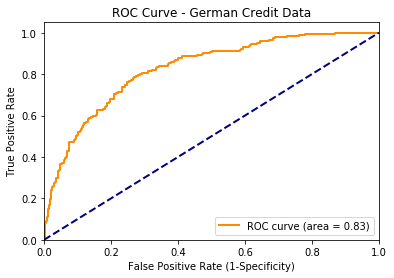

In [214]:
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.metrics import auc 
fpr, tpr, thresholds = metrics.roc_curve(both['cost_matrix'],both['probs'], pos_label=1) 
 
roc_auc = auc(fpr,tpr) 
plt.figure() 
lw = 2 
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate (1-Specificity)') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve - German Credit Data') 
plt.legend(loc="lower right") 
plt.show() 

In [215]:
for i in list(np.arange(0,1,0.1)):
    both["y_pred"] = 0
    both.loc[both["probs"] > i, 'y_pred'] = 1
    print ("Threshold",i,"Train Accuracy:", round(accuracy_score(both['cost_matrix'], both['y_pred']),4))

Threshold 0.0 Train Accuracy: 0.2986
Threshold 0.1 Train Accuracy: 0.5486
Threshold 0.2 Train Accuracy: 0.68
Threshold 0.30000000000000004 Train Accuracy: 0.7514
Threshold 0.4 Train Accuracy: 0.7743
Threshold 0.5 Train Accuracy: 0.7814
Threshold 0.6000000000000001 Train Accuracy: 0.7729
Threshold 0.7000000000000001 Train Accuracy: 0.76
Threshold 0.8 Train Accuracy: 0.7314
Threshold 0.9 Train Accuracy: 0.7043


In [216]:
both["y_pred"] = 0
both.loc[both["probs"] > 0.5, 'y_pred'] = 1
print ("\nTrain Confusion Matrix\n\n", pd.crosstab(both['cost_matrix'], both['y_pred'], rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nTrain Accuracy:",round(accuracy_score(both['cost_matrix'],both['y_pred']),4))


Train Confusion Matrix

 Predicted    0    1
Actuall            
0          438   53
1          100  109

Train Accuracy: 0.7814


In [217]:
y_pred_test = pd.DataFrame( logistic_model.predict( sm.add_constant( x_test.drop(remove_cols,axis=1))))
y_pred_test.columns = ["probs"]
both_test = pd.concat([y_test,y_pred_test],axis=1)
both_test["y_pred"] = 0
both_test.loc[both_test["probs"] > 0.5, 'y_pred'] = 1
print ("\nTest Confusion Matrix\n\n", pd.crosstab( both_test['cost_matrix'],both_test['y_pred'],rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nTest Accuracy:", round(accuracy_score( both_test['cost_matrix'], both_test['y_pred']),4))


Test Confusion Matrix

 Predicted    0   1
Actuall           
0          190  19
1           44  47

Test Accuracy: 0.79


In [218]:
remove_cols_insig = ['pre_emp_snc_A73']

## KNN And Random Forest

In [91]:
dataset.head()


,chk_acc_status,duration_month,credit_history,purpose,credit_amt,sav_acc_bond,emp_since,inst_rate,status_sex,debtors_guarantors,...,property,Age,inst_plans,housing,existing_credit,job,peoplel_liable,telephone,foreign_worker,cost_matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [92]:
dummy_stseca = pd.get_dummies(dataset['chk_acc_status'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(dataset['credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(dataset['purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(dataset['sav_acc_bond'], prefix='sav_acc')
dummy_presc = pd.get_dummies(dataset['emp_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(dataset['status_sex'], prefix='per_stat_sx')
dummy_property = pd.get_dummies(dataset['property'], prefix='property')
dummy_othinstpln = pd.get_dummies(dataset['inst_plans'], prefix='oth_inst_pln')
dummy_forgnwrkr = pd.get_dummies(dataset['foreign_worker'], prefix='forgn_wrkr')
dummy_othdts = pd.get_dummies(dataset['debtors_guarantors'], prefix='oth_debtors')

continuous_columns = ['duration_month', 'credit_amt', 'inst_rate', 'Age', 'existing_credit' ]

credit_continuous = dataset[continuous_columns]
credit_data_new = pd.concat([dummy_stseca,dummy_ch, dummy_purpose,dummy_savacc, dummy_presc,dummy_perssx, dummy_property, dummy_othinstpln,dummy_othdts, dummy_forgnwrkr,credit_continuous,dataset['cost_matrix']],axis=1)

In [93]:
credit_data_new.head()

,status_exs_accnt_A11,status_exs_accnt_A12,status_exs_accnt_A13,status_exs_accnt_A14,cred_hist_A30,cred_hist_A31,cred_hist_A32,cred_hist_A33,cred_hist_A34,purpose_A40,...,oth_debtors_A102,oth_debtors_A103,forgn_wrkr_A201,forgn_wrkr_A202,duration_month,credit_amt,inst_rate,Age,existing_credit,cost_matrix
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,6,1169,4,67,2,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,48,5951,2,22,1,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,12,2096,2,49,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,42,7882,2,45,1,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,24,4870,3,53,2,1


0.666 , chk_acc_status ,type = object
0.293 , credit_history ,type = object
0.261 , duration_month ,type = int64
0.196 , sav_acc_bond ,type = object
0.169 , purpose ,type = object
0.113 , property ,type = object
0.113 , credit_amt ,type = int64
0.103 , Age ,type = int64
0.098 , existing_credit ,type = int64
0.086 , emp_since ,type = object
0.083 , housing ,type = object
0.062 , inst_rate ,type = int64
0.058 , inst_plans ,type = object
0.049 , residence_since ,type = int64
0.045 , status_sex ,type = object
0.044 , foreign_worker ,type = object
0.034 , peoplel_liable ,type = int64
0.032 , debtors_guarantors ,type = object
0.009 , job ,type = object
0.006 , telephone ,type = object

In [94]:
remove_cols_extra_dummy = [ 'cred_hist_A30', 'purpose_A40', 'sav_acc_A61','pre_emp_snc_A71','per_stat_sx_A91', 
                           'oth_debtors_A101','property_A121', 'oth_inst_pln_A141',
                           'oth_debtors_A102',
       'oth_debtors_A103',
                           'forgn_wrkr_A201','forgn_wrkr_A202']

In [95]:
remove_cols_insig = []
remove_cols = list(set(remove_cols_extra_dummy+remove_cols_insig))

In [96]:
credit_data_new = credit_data_new.drop( remove_cols_extra_dummy, axis=1)

In [97]:
random_dataset = credit_data_new

In [98]:
random_dataset.keys()

Index(['status_exs_accnt_A11', 'status_exs_accnt_A12', 'status_exs_accnt_A13',
       'status_exs_accnt_A14', 'cred_hist_A31', 'cred_hist_A32',
       'cred_hist_A33', 'cred_hist_A34', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'sav_acc_A62',
       'sav_acc_A63', 'sav_acc_A64', 'sav_acc_A65', 'pre_emp_snc_A72',
       'pre_emp_snc_A73', 'pre_emp_snc_A74', 'pre_emp_snc_A75',
       'per_stat_sx_A92', 'per_stat_sx_A93', 'per_stat_sx_A94',
       'property_A122', 'property_A123', 'property_A124', 'oth_inst_pln_A142',
       'oth_inst_pln_A143', 'duration_month', 'credit_amt', 'inst_rate', 'Age',
       'existing_credit', 'cost_matrix'],
      dtype='object')

### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
 x_train,x_test,y_train,y_test = train_test_split( credit_data_new.drop( ['cost_matrix'],axis=1),credit_data_new['cost_matrix'],train_size = 0.7,random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [101]:
rf_fit = RandomForestClassifier( n_estimators=1000, criterion="gini", max_depth=100, min_samples_split=3,min_samples_leaf=2)
rf_fit.fit(x_train,y_train)

print ("\nRandom Forest -Train Confusion Matrix\n\n", pd.crosstab(y_train, rf_fit.predict( x_train),rownames = ["Actual"],colnames = ["Predicted"]))
print ("\n Random Forest - Train accuracy",round(accuracy_score( y_train, rf_fit.predict(x_train)),3))

print ("\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test, rf_fit.predict(x_test),rownames = ["Actual"],colnames = ["Predicted"]))
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test, rf_fit.predict(x_test)),3))


Random Forest -Train Confusion Matrix

 Predicted    0    1
Actual             
0          491    0
1           35  174

 Random Forest - Train accuracy 0.95

Random Forest - Test Confusion Matrix

 Predicted    0   1
Actual            
0          195  14
1           56  35

Random Forest - Test accuracy 0.767


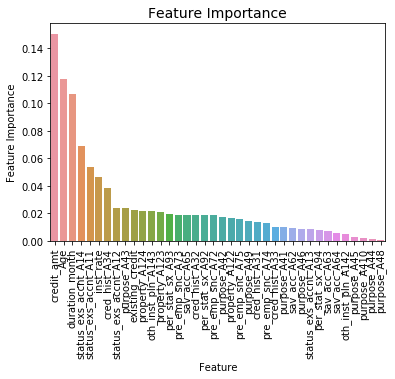

In [349]:
predictors = ['status_exs_accnt_A11', 'status_exs_accnt_A12', 'status_exs_accnt_A13',
       'status_exs_accnt_A14', 'cred_hist_A31', 'cred_hist_A32',
       'cred_hist_A33', 'cred_hist_A34', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'sav_acc_A62',
       'sav_acc_A63', 'sav_acc_A64', 'sav_acc_A65', 'pre_emp_snc_A72',
       'pre_emp_snc_A73', 'pre_emp_snc_A74', 'pre_emp_snc_A75',
       'per_stat_sx_A92', 'per_stat_sx_A93', 'per_stat_sx_A94',
       'property_A122', 'property_A123', 'property_A124', 'oth_inst_pln_A142',
       'oth_inst_pln_A143', 'duration_month', 'credit_amt', 'inst_rate', 'Age',
       'existing_credit']
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': rf_fit.feature_importances_ })
tmp = tmp.sort_values(by='Feature Importance', ascending= False)
plt.Figure(figsize= (7,4))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

### KNN

In [102]:
credit_data_new.keys()

Index(['status_exs_accnt_A11', 'status_exs_accnt_A12', 'status_exs_accnt_A13',
       'status_exs_accnt_A14', 'cred_hist_A31', 'cred_hist_A32',
       'cred_hist_A33', 'cred_hist_A34', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'sav_acc_A62',
       'sav_acc_A63', 'sav_acc_A64', 'sav_acc_A65', 'pre_emp_snc_A72',
       'pre_emp_snc_A73', 'pre_emp_snc_A74', 'pre_emp_snc_A75',
       'per_stat_sx_A92', 'per_stat_sx_A93', 'per_stat_sx_A94',
       'property_A122', 'property_A123', 'property_A124', 'oth_inst_pln_A142',
       'oth_inst_pln_A143', 'duration_month', 'credit_amt', 'inst_rate', 'Age',
       'existing_credit', 'cost_matrix'],
      dtype='object')

In [103]:
credit_data_new.shape

(1000, 39)

In [104]:
x_vars = credit_data_new.drop(['cost_matrix'],axis=1) 
y_var = credit_data_new['cost_matrix'] 
from sklearn.preprocessing import StandardScaler 
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values) 
from sklearn.model_selection import train_test_split 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [105]:
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns) 
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var, train_size = 0.7,random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [107]:
from sklearn.neighbors import KNeighborsClassifier 
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski') 
knn_fit.fit(x_train,y_train) 
 
print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train, knn_fit.predict(x_train),rownames = ["Actual"],colnames = ["Predicted"]) )      
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train, knn_fit.predict(x_train)),3)) 
print ("\nK-Nearest Neighbors - Train Classification Report\n", classification_report( y_train,knn_fit.predict(x_train))) 
 
print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test, knn_fit.predict(x_test),rownames = ["Actual"],colnames = ["Predicted"]))       
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score( y_test,knn_fit.predict(x_test)),3)) 
print ("\nK-Nearest Neighbors - Test Classification Report\n", classification_report(y_test,knn_fit.predict(x_test))) 
 


K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actual             
0          443   48
1           73  136

K-Nearest Neighbors - Train accuracy: 0.827

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.86      0.90      0.88       491
          1       0.74      0.65      0.69       209

avg / total       0.82      0.83      0.82       700



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actual            
0          170  39
1           52  39

K-Nearest Neighbors - Test accuracy: 0.697

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.77      0.81      0.79       209
          1       0.50      0.43      0.46        91

avg / total       0.69      0.70      0.69       300



### Feature Importance

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': clf3.feature_importances_ })
tmp = tmp.sort_values(by='Feature Importance', ascending= False)
plt.Figure(figsize= (7,4))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()